### 1. SumZero.com Summary

Sum-Zero is a mix of an investment wikipedia and a social networking site, created to target the issue of lack of resources for buy-side analysts to share trading ideas and network. This allows buy-side analysts to work on investment theses and share strategies and stock valuations to the community. This is opposed to sell-side analysts who are often pressured to provide earnings forecasts or valuations that are within the consensus cluster; and/or limited coverage due to business operations within the investment banking sector. SumZero is also able to provide and distribute weekly top trading ideas to subscribers.

Systematic traders rely on signals to trade across a larger investment universe and SumZero might be useful for such signal generation. Discretionary traders might look at the top trading ideas, read the reports and trade on highest conviction ideas. A systematic trader relies on the law of large numbers and computational methods; alpha comes from statistical methods across a large universe of stocks. One might use SumZero to retrieve a vector of signals depending on valuations or earning forecast revisions, rank the signals, and create a dollar-neutral self-financing portfolio that longs the top X percentile and short the bottom X percentile.

### 2a. Display portfolio daily returns

Assumptions:
* No transaction costs
* No slippage
* Data integrity from data vendor is maintained

In [50]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import yahoo_fin.stock_info as si
sns.set()

import warnings
warnings.filterwarnings("ignore")

start = dt.datetime(2018, 9, 30)
end = dt.datetime(2018, 12, 31)

stock_tickers = ['MSFT','ORCL','IBM','AAPL','BMRC']
stock_pos = [350, -210, -150, 32, 100]

stock_data = pdr.DataReader(stock_tickers,'yahoo',start=start, end=end)

In [72]:
# get df of Adj close prices
df = stock_data.loc[:, ('Adj Close', ('MSFT','ORCL','IBM','AAPL','BMRC'))]
df.columns = df.columns.droplevel()
df.columns = stock_tickers

holdings_list = []

for stock,pos in zip(stock_tickers,stock_pos):
    holdings_list.append(stock+'_HOLDINGS')
    df[stock+'_POS'] = pos
    df[stock+'_HOLDINGS'] = df[stock+'_POS'].multiply(df[stock].to_numpy(), axis=0)
df['TOTAL_HOLDINGS'] = df[holdings_list].sum(axis=1)
df['RETURNS'] = df['TOTAL_HOLDINGS'].pct_change().fillna(0)
df

,MSFT,ORCL,IBM,AAPL,BMRC,MSFT_POS,MSFT_HOLDINGS,ORCL_POS,ORCL_HOLDINGS,IBM_POS,IBM_HOLDINGS,AAPL_POS,AAPL_HOLDINGS,BMRC_POS,BMRC_HOLDINGS,TOTAL_HOLDINGS,RETURNS
Date,,,,,,,,,,,,,,,,,
2018-10-01,110.279938,48.256409,118.789513,54.645790,37.299915,350,38597.978210,-210,-10133.845825,-150,-17818.426895,32,1748.665283,100,3729.991531,16124.362305,0.000000
2018-10-02,109.841148,46.793808,119.371826,55.131512,37.052036,350,38444.401932,-210,-9826.699677,-150,-17905.773926,32,1764.208374,100,3705.203629,16181.340332,0.003534
2018-10-03,109.860222,46.346645,118.960312,55.802380,37.588367,350,38451.077652,-210,-9732.795525,-150,-17844.046783,32,1785.676147,100,3758.836746,16418.748238,0.014672
2018-10-04,107.589973,46.085804,117.477402,54.821323,38.039070,350,37656.490707,-210,-9678.018837,-150,-17621.610260,32,1754.282349,100,3803.907013,15915.050972,-0.030678
2018-10-05,106.960396,45.974010,115.707184,53.931641,37.926388,350,37436.138535,-210,-9654.542198,-150,-17356.077576,32,1725.812500,100,3792.638779,15943.970039,0.001817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,90.178154,39.929741,84.581268,35.429192,34.404533,350,31562.353897,-210,-8385.245590,-150,-12687.190247,32,1133.734131,100,3440.453339,15064.105530,-0.050150
2018-12-26,96.338196,41.706886,87.584892,37.924171,35.436398,350,33718.368530,-210,-8758.446121,-150,-13137.733841,32,1213.573486,100,3543.639755,16579.401810,0.100590
2018-12-27,96.932167,42.062317,89.464127,37.678047,35.146755,350,33926.258469,-210,-8833.086548,-150,-13419.618988,32,1205.697510,100,3514.675522,16393.925964,-0.011187


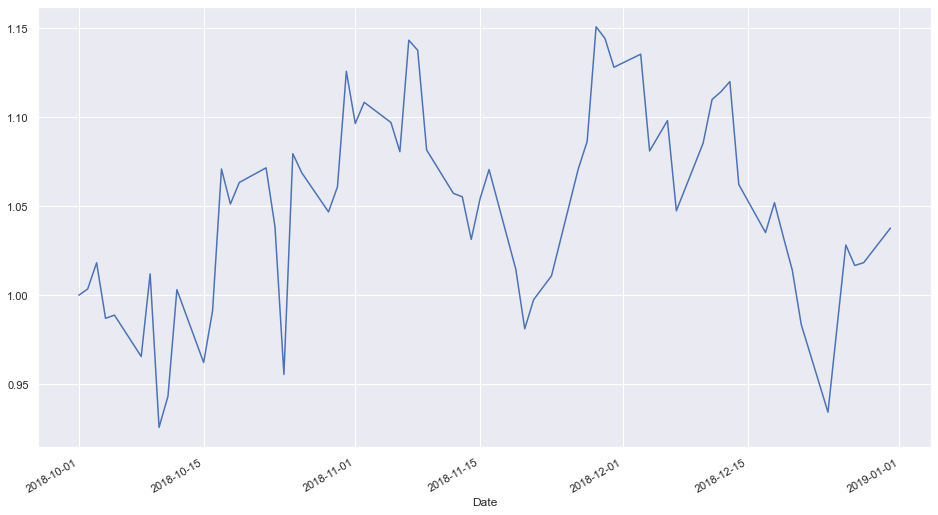

In [153]:
# plot cumulative return
(1 + df['RETURNS']).cumprod().plot(figsize=(16,9))
plt.show()

### 2b. Consensus Sell Side Earnings Estimates

We look at the Earnings Per Share Estimates and Earnings Per Share Actual throughout the holding period.

In [70]:
# get historical sell-side consensus EPS from stock info
MSFT_EPS = pd.DataFrame.from_dict(si.get_earnings_history("MSFT")).sort_values(by='startdatetime',ascending=True).reset_index()
ORCL_EPS = pd.DataFrame.from_dict(si.get_earnings_history("ORCL")).sort_values(by='startdatetime',ascending=True).reset_index()
IBM_EPS = pd.DataFrame.from_dict(si.get_earnings_history("IBM")).sort_values(by='startdatetime',ascending=True).reset_index()
AAPL_EPS = pd.DataFrame.from_dict(si.get_earnings_history("AAPL")).sort_values(by='startdatetime',ascending=True).reset_index()
BMRC_EPS = pd.DataFrame.from_dict(si.get_earnings_history("BMRC")).sort_values(by='startdatetime',ascending=True).reset_index()

MSFT_EPS['startdatetime'] = pd.to_datetime(MSFT_EPS['startdatetime'], format='%Y-%m-%d').dt.tz_localize(None).dt.date
ORCL_EPS['startdatetime'] = pd.to_datetime(ORCL_EPS['startdatetime'], format='%Y-%m-%d').dt.tz_localize(None)
IBM_EPS['startdatetime'] = pd.to_datetime(IBM_EPS['startdatetime'], format='%Y-%m-%d').dt.tz_localize(None)
AAPL_EPS['startdatetime'] = pd.to_datetime(AAPL_EPS['startdatetime'], format='%Y-%m-%d').dt.tz_localize(None)
BMRC_EPS['startdatetime'] = pd.to_datetime(BMRC_EPS['startdatetime'], format='%Y-%m-%d').dt.tz_localize(None)

MSFT_EPS = MSFT_EPS.set_index('startdatetime',drop=True)
ORCL_EPS = ORCL_EPS.set_index('startdatetime',drop=True)
IBM_EPS = IBM_EPS.set_index('startdatetime',drop=True)
AAPL_EPS = AAPL_EPS.set_index('startdatetime',drop=True)
BMRC_EPS = BMRC_EPS.set_index('startdatetime',drop=True)

In [116]:
MSFT_EPS[(MSFT_EPS.index >= dt.datetime(2018,4,1)) & (MSFT_EPS.index <= end)][['epsestimate','epsactual','epssurprisepct']]

,epsestimate,epsactual,epssurprisepct
startdatetime,,,
2018-04-26 16:04:00,0.85,0.95,11.90
2018-07-19 16:05:00,1.08,1.13,5.02
2018-10-24 16:07:00,0.96,1.14,18.38


In [117]:
ORCL_EPS[(ORCL_EPS.index >= dt.datetime(2018,4,1)) & (ORCL_EPS.index <= end)][['epsestimate','epsactual','epssurprisepct']]

,epsestimate,epsactual,epssurprisepct
startdatetime,,,
2018-06-19 16:02:00,0.94,0.99,5.32
2018-09-17 16:05:00,0.69,0.71,3.50
2018-12-17 16:02:00,0.78,0.80,2.30


In [118]:
IBM_EPS[(IBM_EPS.index >= dt.datetime(2018,4,1)) & (IBM_EPS.index <= end)][['epsestimate','epsactual','epssurprisepct']]

,epsestimate,epsactual,epssurprisepct
startdatetime,,,
2018-04-17 16:08:00,2.42,2.45,1.37
2018-07-18 16:03:00,3.04,3.08,1.25
2018-10-16 16:07:00,3.40,3.42,0.68


In [114]:
AAPL_EPS[(AAPL_EPS.index >= dt.datetime(2018,4,1)) & (AAPL_EPS.index <= end)][['epsestimate','epsactual','epssurprisepct']]

,epsestimate,epsactual,epssurprisepct
startdatetime,,,
2018-05-01 16:30:00,2.67,2.73,2.13
2018-07-31 16:30:00,2.18,2.34,7.29
2018-11-01 16:30:00,0.70,0.73,4.60


In [115]:
BMRC_EPS[(BMRC_EPS.index >= dt.datetime(2018,4,1)) & (BMRC_EPS.index <= end)][['epsestimate','epsactual','epssurprisepct']]

,epsestimate,epsactual,epssurprisepct
startdatetime,,,
2018-04-23 08:00:00,0.46,0.46,0.00
2018-07-23 08:00:00,0.51,0.56,9.16
2018-10-22 08:00:00,0.58,0.62,5.49


### 2c. Major factors impacting the performance of portfolio during holding period

> Plotting the performance of the broader market indices during portfolio holding period.

In [143]:
index_tickers = ['SP500','DJIA','NASDAQCOM']

index_data = pdr.DataReader(index_tickers,'fred',start=start, end=end)
index_data = index_data.fillna(method='ffill')
index_data.index.names = ['Date']

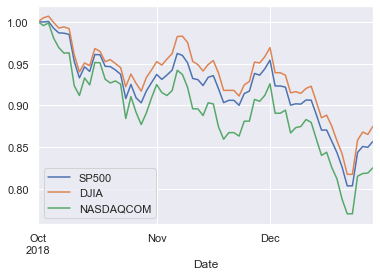

In [154]:
np.log(index_data/index_data.shift(1)).fillna(0).cumsum().apply(np.exp).plot()
plt.show()

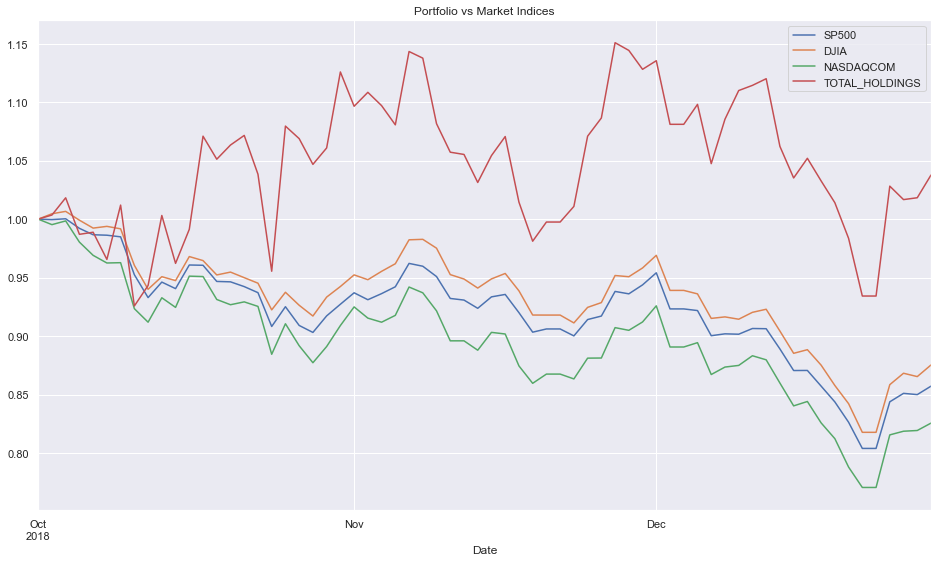

In [156]:
combined = pd.merge(index_data,df[['TOTAL_HOLDINGS']],how='left',on='Date').fillna(method='ffill')
combined_ret = combined.pct_change().fillna(0)

#plot equity curves

(1 + combined_ret).cumprod().plot(figsize = (16,9))
plt.title('Portfolio vs Market Indices')
plt.show()

### Market-neutral Portfolio

Potential equity strategy: `Previous quarter's Earnings-per-Share surprise`

> The portfolio has been rather insulated to broader market movements, as market-neutral portfolios seek to generate absolute returns rather than relative returns. By taking zero-systemmatic risk, the portfolio is agnostic to predictions on the general market.

> From the earnings consensus above, it is possible that the portfolio attempts to create a market-neutral strategy by ranking the last quarter's EPS surprise, assigning portfolio weights on a vector, and then de-meaning the vector of portfolio weights to create a long-short portfolio that is orthogonal to the market risk factor. Strategies like these tend to generate returns that are statistically uncorrelated with market movements.

> The strategy attempts to generate returns through statistical arbitrage by the law of large numbers; meaning that as the universe increases, the more stable the portfolio returns and sharpe ratio is.

</br>

> Zero-beta portfolio which can be constructed over a portfolio of stocks with weights:

$\sum_i W_i \beta_i = 0$ where $W_i$ are portfolio weights.

> This can also be approximated using a dollar-neutral portfolio:

$\sum_i W_i = 0$ where $W_i$ are portfolio weights.

In [162]:
eps_surprise = [5.02, 3.50, 1.25, 7.29, 9.16]

portfolio_eps = pd.DataFrame({'STOCK':stock_tickers,'EPS_SURPRISE':eps_surprise})
portfolio_eps.sort_values('EPS_SURPRISE',ascending=False).reset_index(drop=True)

,STOCK,EPS_SURPRISE
0,BMRC,9.16
1,AAPL,7.29
2,MSFT,5.02
3,ORCL,3.50
4,IBM,1.25


> Strategy on EPS surprise:

* Based on previous quarter's EPS Surprise numbers, we can build a market-neutral portfolio that goes long on the top 50 percentile and short the bottom 50 percentile.
* Transform portfolio to market-neutral portfolio by de-meaning the vector of weights.

> Strategy on any equity strategy:

* We can also build any equities trading strategy based on a signal which produces a set of weights: $[w_1, w_2,...w_n]$
* Transform weight vector into weights $[w'_1, w'_2,...w'_n]$ by: $w'_i = w_i - w_{mean}$ where $w_{mean}$ is arithmetic average of all weights.

> Neutralisation extension:
* We can further extend neutrality on any format by subtracting the factor mean weight instead of the global mean.
* Example would be industry neutrality (portfolio that is orthogonal to industry market movements)
* We can do this by transforming weight vector $[w'_1, w'_2,...w'_n]$ by: $w'_i = w_i - w_{industry-mean}$ where $w_{industry-mean}$ is arithmetic industry average of the weights.

### 3. Biggest advantages and drawbacks of SumZero over IBES

Assuming no technical, cost difference, or information asymmetry between the 2 platforms, focus will be solely on the fact that SumZero ratings are primarily buy-side, while IBES are primarily sell-side:

> Advantages:
* Buy-side coverage is typically larger than sell-side coverage. Sell-side coverage may be indirectly linked to business operations in the investment banking division, where they may be incentivized to create liquidity for company bonds, equity offerings or Initial Public Offerings (IPO) of larger companies that have business relations with the IB division. Buy-side analysts do not have such divisions, and therefore able to cover broader set of stocks and companies, and their estimates will be more orthogonal.
* There is a herding phenomenon among sell-side analysts, where they do not want to be too far off from the consensus. Buy-side analysts tend to not have this herding effect. Analyst herding can distort information diessemination and cause overemphasis on certain data points.
* Buy-side analysts do not have a positive bias on stocks, as sell-side analysts do with respect to career considerations.

> Disadvantages:
* Buy-side analysts may not have unique information that sell-side analysts possess. Since sell-side analysts have resources within the investment banking sector, they may be better at information synthesis that predispose their ratings to be of higher quality.
* Buy-side ratings may be due to idea pushing or strategy pushing, which is an attempt to create momentum in stock price without a sound investment thesis. If an instution already has position in a specific stock or company, it may influence the analyst to release positive ratings for the said company.